<a href="https://colab.research.google.com/github/RubenFranc/CDA_Taller2/blob/main/model/FruitsClasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RubenFranc/CDA_Taller2

Cloning into 'CDA_Taller2'...
remote: Enumerating objects: 5402, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5402 (delta 0), reused 3 (delta 0), pack-reused 5398 (from 1)
Receiving objects: 100% (5402/5402), 221.08 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (151/151), done.
Updating files: 100% (4963/4963), done.


In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [3]:
#Numpy y Pandas
import pandas as pd
import numpy as np
from numpy import asarray

#Librerías de Scikit Learn
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#Librerías de Keras y Tensor Flow
import tensorflow as tf
import keras_tuner as kt

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, Rescaling, Lambda, MaxPooling2D, Conv2D, AveragePooling2D, Activation, Reshape
from keras import backend as K
from keras import applications
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

#Gráficos
import matplotlib.pyplot as plt
%matplotlib inline

#Otras Librerías
import os
from PIL import Image
from tqdm import tqdm

#Verificamos las versiones de las librerías
print(f"La versión de sklearn es: {sklearn.__version__}")
print('Tensorflow version:', tf.__version__)

La versión de sklearn es: 1.5.2
Tensorflow version: 2.17.1


In [ ]:
def convertImagesToArrays(dataset:str)->tuple:
    print('\nFORMATEANDO IMÁGENES DE '+dataset.upper())
    data='CDA_Taller2/model/data/'+dataset+'/Fruit'
    categories=os.listdir(data)
    im_size=50
    dataToArray=[]
    labels=[]
    for category in range(len(categories)):
        path=data+'/'+categories[category]
        label=category
        l=os.listdir(path)
        for im in tqdm(range(len(l))):
            new_im=Image.open(os.path.join(path,l[im])).resize((im_size,im_size))
            im_array=np.asanyarray(new_im)
            dataToArray.append(im_array)
            labels.append(label)

    num_images=len(dataToArray)
    index=np.int64(np.linspace(0,num_images-1,num_images))
    np.random.shuffle(index)
    s_data=[]
    s_labels=[]
    for i in range(len(index)):
        try:
            s_data.append(dataToArray[index[i]])
            s_labels.append(labels[index[i]])
        except Exception as e:
            pass
    s_dataToArray=np.array(s_data)
    s_labels=np.array(s_labels)
    return s_dataToArray,s_labels

In [ ]:
s_train_data,s_train_labels=convertImagesToArrays('train')
s_test_data,s_test_labels=convertImagesToArrays('test')
s_val_data,s_val_labels=convertImagesToArrays('val')


FORMATEANDO IMÁGENES DE TRAIN


100%|██████████| 22/22 [00:00<00:00, 222.47it/s]



FORMATEANDO IMÁGENES DE TEST


100%|██████████| 22/22 [00:00<00:00, 260.55it/s]



FORMATEANDO IMÁGENES DE VAL


100%|██████████| 5/5 [00:00<00:00, 317.27it/s]


In [ ]:
data='CDA_Taller2/model/data/train/Fruit'
categories=os.listdir(data)
categories.sort()
categories

['Apple',
 'Avocado',
 'Banana',
 'Kiwi',
 'Lemon',
 'Lime',
 'Mango',
 'Melon',
 'Nectarine',
 'Orange',
 'Papaya',
 'Passion-Fruit',
 'Peach',
 'Pear',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Red-Grapefruit',
 'Satsumas']

In [ ]:
model = Sequential(name="Mi_primer_RNC")

In [ ]:
model.add(Input(shape=(256, 256, 3), batch_size=None, name='Capa_Entrada'))
model.add(Rescaling(1./255, name='Capa_Reescalado'))

model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu', name='Capa_Convolucional_1'))
model.add(MaxPooling2D((2, 2), name='Max_Pool_1'))
model.add(Conv2D(128, (3, 3), activation='relu', name='Capa_Convolucional_2'))
model.add(AveragePooling2D((2, 2), name='Avg_Pool_1'))
model.add(Conv2D(256, (3, 3), activation='relu', name='Capa_Convolucional_3'))
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370,816 (1.41 MB)

 Trainable params: 370,816 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Flatten(name='Flatten_Layer'))
model.add(Dense(128,activation='relu',name='Capa_Densa_1'))
model.add(Dense(64,activation='relu',name='Capa_Densa_2'))
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 921600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_1 (Dense)                 │ (None, 128)                 │     117,964,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_2 (Dense)                 │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,344,000 (451.45 MB)

 Trainable params: 118,344,000 (451.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Dense(len(categories), activation='softmax', name='Capa_Respuesta'))
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 921600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_1 (Dense)                 │ (None, 128)                 │     117,964,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_2 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Respuesta (Dense)               │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,345,235 (451.45 MB)

 Trainable params: 118,345,235 (451.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 921600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_1 (Dense)                 │ (None, 128)                 │     117,964,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_2 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Respuesta (Dense)               │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,345,235 (451.45 MB)

 Trainable params: 118,345,235 (451.45 MB)

 Non-trainable params: 0 (0.00 B)

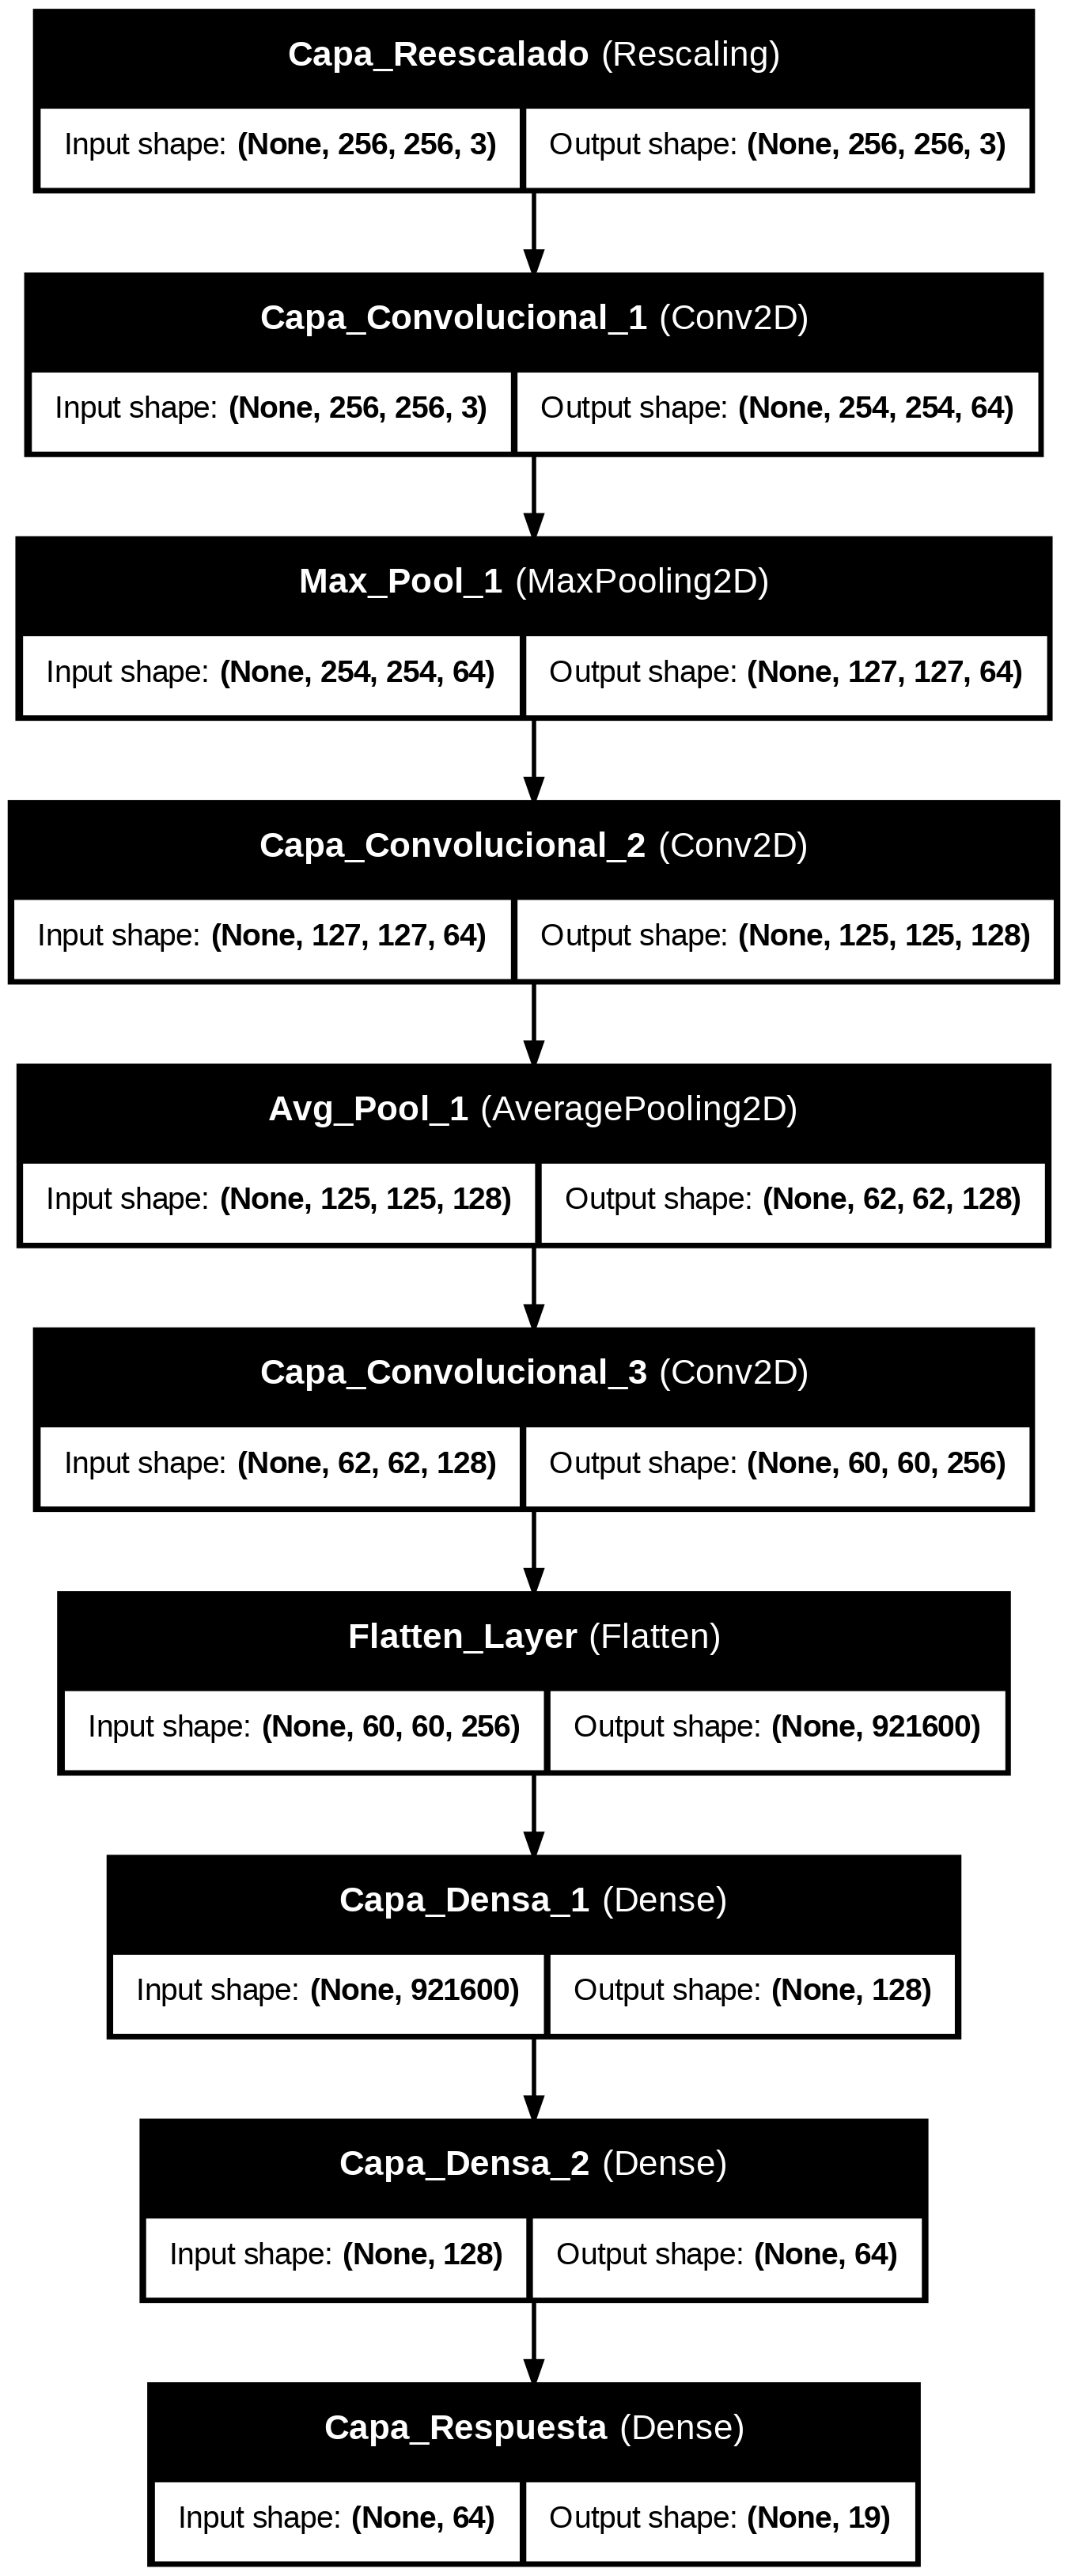

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3)
]

In [ ]:
device_name = tf.test.gpu_device_name()
gpu_name = '/device:GPU:0'
if device_name != gpu_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'CDA_Taller2/model/data/train/Fruit',
  label_mode='categorical',
  seed=82,
  image_size=(256, 256),
  batch_size=32
)

Found 1142 files belonging to 19 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  'CDA_Taller2/model/data/test/Fruit',
  label_mode='categorical',
  seed=82,
  image_size=(256, 256),
  batch_size=32
)

Found 1117 files belonging to 19 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'CDA_Taller2/model/data/val/Fruit',
  label_mode='categorical',
  seed=82,
  image_size=(256, 256),
  batch_size=32
)

Found 111 files belonging to 16 classes.


In [ ]:
with tf.device(gpu_name):
  history = model.fit(train_ds,
          validation_data=test_ds,
          epochs=10
  )

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 5.2596 - precision: 0.1758 - recall: 0.0175 - val_loss: 2.4508 - val_precision: 0.7519 - val_recall: 0.0868
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 2.2757 - precision: 0.6859 - recall: 0.0991 - val_loss: 1.9863 - val_precision: 0.6813 - val_recall: 0.1531
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - loss: 1.7574 - precision: 0.6828 - recall: 0.1739 - val_loss: 1.9539 - val_precision: 0.4437 - val_recall: 0.1164
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 1.3909 - precision: 0.7012 - recall: 0.2971 - val_loss: 2.5776 - val_precision: 0.4474 - val_recall: 0.2399
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - loss: 1.0289 - precision: 0.8042 - recall: 0.5413 - val_loss: 2.6586 - val_precision: 0.4056 - val_recall: 0.2578
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - loss: 0.6288 - precision: 0.8618 - recall: 0.6994 - val_loss: 2.9067 - val_precision: 0.3848 - val_recall

In [ ]:
y_true = list()
y_pred = list()

for images, labels in train_ds:
    pred = model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] == pred[i].max()).astype(int))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━

In [ ]:
print(classification_report(y_true,y_pred,target_names=list(categories)))

                precision    recall  f1-score   support

         Apple       1.00      0.95      0.97       278
       Avocado       1.00      1.00      1.00        41
        Banana       0.92      1.00      0.96        45
          Kiwi       1.00      0.96      0.98        46
         Lemon       0.98      1.00      0.99        42
          Lime       1.00      1.00      1.00        31
         Mango       1.00      1.00      1.00        32
         Melon       0.99      0.99      0.99       154
     Nectarine       1.00      1.00      1.00        36
        Orange       1.00      0.98      0.99        57
        Papaya       1.00      1.00      1.00        21
 Passion-Fruit       1.00      1.00      1.00        28
         Peach       1.00      1.00      1.00        37
          Pear       0.99      1.00      1.00       116
     Pineapple       1.00      1.00      1.00        26
          Plum       1.00      1.00      1.00        22
   Pomegranate       0.76      1.00      0.87  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


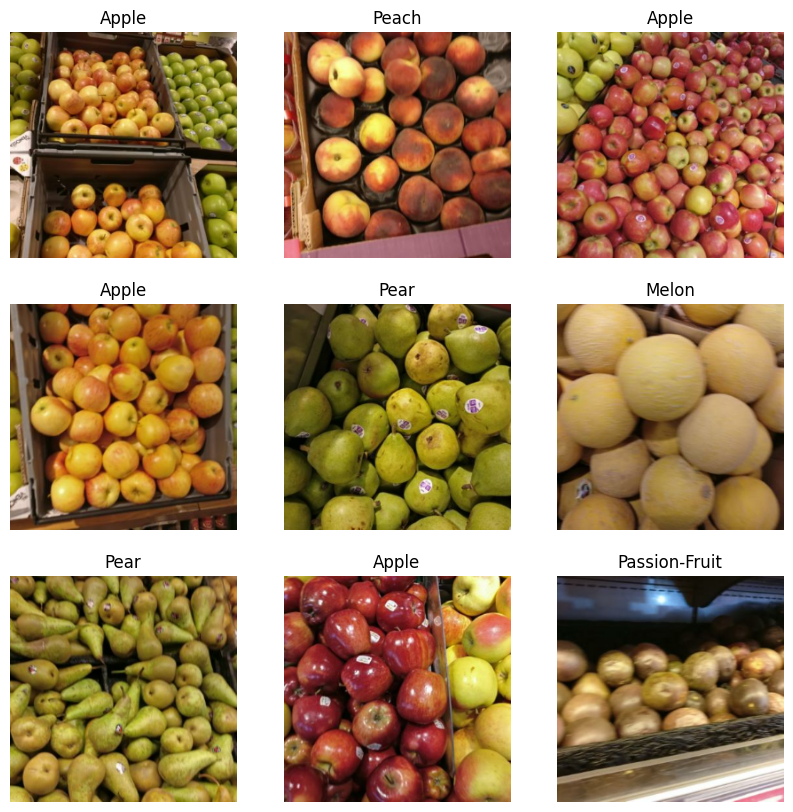

In [ ]:
plt.figure(figsize=(10, 10))

df = train_ds.take(1)
for images, labels in df:
  pred = model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[tf.argmax(pred[i]).numpy()])
    plt.axis("off")


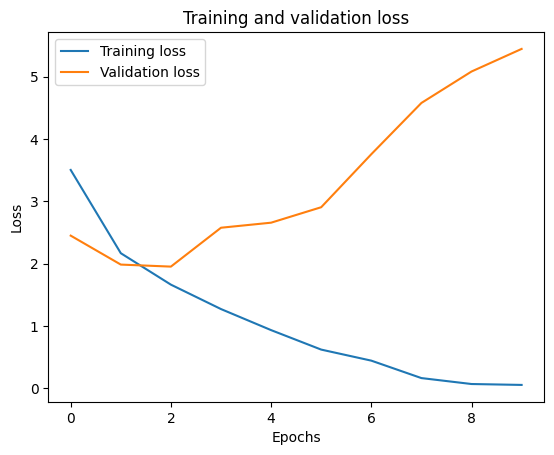

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

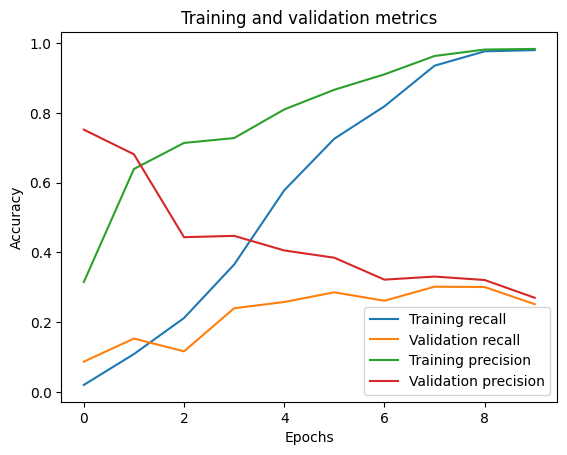

In [ ]:
plt.plot(history.history['recall'], label='Training recall')
plt.plot(history.history['val_recall'], label='Validation recall')
plt.plot(history.history['precision'], label='Training precision')
plt.plot(history.history['val_precision'], label='Validation precision')
plt.title('Training and validation metrics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_true = list()
y_pred = list()

for images, labels in test_ds:
    pred = model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] == pred[i].max()).astype(int))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [ ]:
print(classification_report(y_true, y_pred, target_names=list(categories)))

                precision    recall  f1-score   support

         Apple       0.50      0.32      0.39       276
       Avocado       0.20      0.28      0.23        40
        Banana       0.09      0.23      0.13        44
          Kiwi       0.24      0.18      0.20        45
         Lemon       0.12      0.24      0.17        41
          Lime       0.62      0.17      0.26        30
         Mango       0.13      0.06      0.09        31
         Melon       0.38      0.40      0.39       153
     Nectarine       0.00      0.00      0.00        35
        Orange       0.20      0.20      0.20        56
        Papaya       0.00      0.00      0.00        21
 Passion-Fruit       0.29      0.15      0.20        27
         Peach       0.12      0.08      0.10        36
          Pear       0.21      0.27      0.24       108
     Pineapple       0.14      0.04      0.06        25
          Plum       0.10      0.05      0.06        22
   Pomegranate       0.04      0.12      0.06  

In [ ]:
plt.figure(figsize=(10, 10))

df = test_ds.take(1)
for images, labels in df:
  pred = model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[tf.argmax(pred[i]).numpy()])
    plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
def construirMejorModelo(hip):
  bModel = Sequential(name="Modelo_Simple")

  # Entrada
  bModel.add(Input(shape=(256, 256, 3), name='Entrada'))

  # Reescalado
  bModel.add(Rescaling(1./255, name='Reescalado'))

  # Capas Convolucionales y de Pooling
  bModel.add(Conv2D(filters=hip.Int('conv_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hip.Choice('conv_kernel', values=[3, 5]),
                     activation='relu',
                     name='Convolucional_1'))

  bModel.add(MaxPooling2D((2, 2), name='MaxPooling_1'))

  bModel.add(Conv2D(filters=hip.Int('conv_filters_2', min_value=64, max_value=256, step=64),
                     kernel_size=hip.Choice('conv_kernel_2', values=[3, 5]),
                     activation='relu',
                     name='Convolucional_2'))

  bModel.add(MaxPooling2D((2, 2), name='MaxPooling_2'))

  bModel.add(Conv2D(filters=hip.Int('conv_filters_3', min_value=32, max_value=128, step=32),
                     kernel_size=hip.Choice('conv_kernel_3', values=[3, 5]),
                     activation='relu',
                     name='Convolucional_3'))

  bModel.add(MaxPooling2D((2, 2), name='MaxPooling_3'))

  # Capas Densas
  bModel.add(Flatten(name='Flatten'))
  bModel.add(Dense(units=hip.Int('dense_units', min_value=64, max_value=128, step=64),
                    activation='relu', name='Densa'))
  bModel.add(Dense(19, activation='softmax', name='Salida'))

  # Compilación del modelo
  bModel.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=["accuracy"])

  return bModel

In [ ]:
tuner = kt.RandomSearch(
    construirMejorModelo,
    objective="val_accuracy",
    project_name="cls_fruta2",
    seed=82,
    max_trials=10)

In [ ]:
with tf.device(gpu_name):
  tuner.search(train_ds, validation_data=test_ds, epochs=10)

Trial 10 Complete [00h 02m 52s]
val_accuracy: 0.36078783869743347

Best val_accuracy So Far: 0.398388534784317
Total elapsed time: 00h 25m 51s


In [ ]:
best_model=tuner.get_best_models()[0]
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.values

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'conv_filters': 64,
 'conv_kernel': 3,
 'conv_filters_2': 128,
 'conv_kernel_2': 3,
 'conv_filters_3': 32,
 'conv_kernel_3': 5,
 'dense_units': 64}

In [ ]:
y_true = list()
y_pred = list()

for images, labels in train_ds:
    pred = best_model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] > 0.5).astype(int))  # Convertir a 1 si la probabilidad es mayor a 0.5, 0 en caso contrario

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

In [ ]:
print(classification_report(y_true,y_pred,target_names=list(categories)))

                precision    recall  f1-score   support

         Apple       0.77      0.85      0.81       278
       Avocado       1.00      0.63      0.78        41
        Banana       1.00      0.02      0.04        45
          Kiwi       1.00      0.52      0.69        46
         Lemon       0.74      0.60      0.66        42
          Lime       1.00      0.29      0.45        31
         Mango       0.67      0.06      0.11        32
         Melon       0.85      0.75      0.80       154
     Nectarine       0.94      0.86      0.90        36
        Orange       0.97      0.67      0.79        57
        Papaya       1.00      0.05      0.09        21
 Passion-Fruit       1.00      0.86      0.92        28
         Peach       1.00      0.51      0.68        37
          Pear       0.95      0.30      0.46       116
     Pineapple       0.74      0.77      0.75        26
          Plum       1.00      0.95      0.98        22
   Pomegranate       1.00      0.31      0.47  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


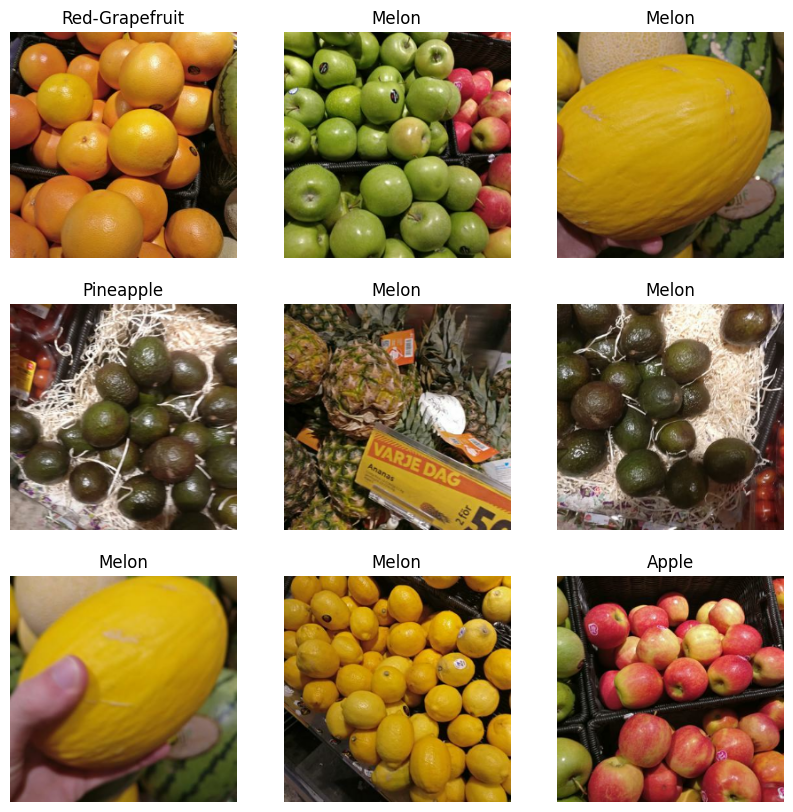

In [ ]:
plt.figure(figsize=(10, 10))

df = val_ds.take(1)
for images, labels in df:
  pred = best_model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[tf.argmax(pred[i]).numpy()])
    plt.axis("off")

In [ ]:
y_true = list()
y_pred = list()

for images, labels in test_ds:
    pred = best_model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] > 0.5).astype(int))  # Convertir a 1 si la probabilidad es mayor a 0.5, 0 en caso contrario

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [ ]:
print(classification_report(y_true,y_pred,target_names=list(categories)))

                precision    recall  f1-score   support

         Apple       0.59      0.68      0.63       276
       Avocado       0.00      0.00      0.00        40
        Banana       0.00      0.00      0.00        44
          Kiwi       0.60      0.07      0.12        45
         Lemon       0.30      0.15      0.20        41
          Lime       1.00      0.03      0.06        30
         Mango       0.00      0.00      0.00        31
         Melon       0.50      0.35      0.41       153
     Nectarine       0.44      0.46      0.45        35
        Orange       0.33      0.20      0.25        56
        Papaya       0.00      0.00      0.00        21
 Passion-Fruit       0.40      0.15      0.22        27
         Peach       1.00      0.06      0.11        36
          Pear       0.31      0.05      0.08       108
     Pineapple       0.13      0.08      0.10        25
          Plum       0.40      0.09      0.15        22
   Pomegranate       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Guarda el modelo
best_model.save("cls_fruta_.h5")

In [ ]:
#from google.colab import files

# Guardar el archivo (si aún no lo has hecho)
# model.save("modelo.h5")

# Descargar el archivo
#files.download("cls_fruta_.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from tensorflow.keras.models import load_model
modelo = load_model('/content/CDA_Taller2/model//trained_models/cls_fruta_.h5')

In [5]:
modelo.summary()

Model: "Modelo_Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Reescalado (Rescaling)               │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucional_1 (Conv2D)             │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_1 (MaxPooling2D)          │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucional_2 (Conv2D)             │ (None, 125, 125, 192)       │          55,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_2 (MaxPooling2D)          │ (None, 62, 62, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucional_3 (Conv2D)             │ (None, 60, 60, 128)         │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_3 (MaxPooling2D)          │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Densa (Dense)                        │ (None, 64)                  │       7,372,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Salida (Dense)                       │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,651,797 (29.19 MB)

 Trainable params: 7,651,795 (29.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)